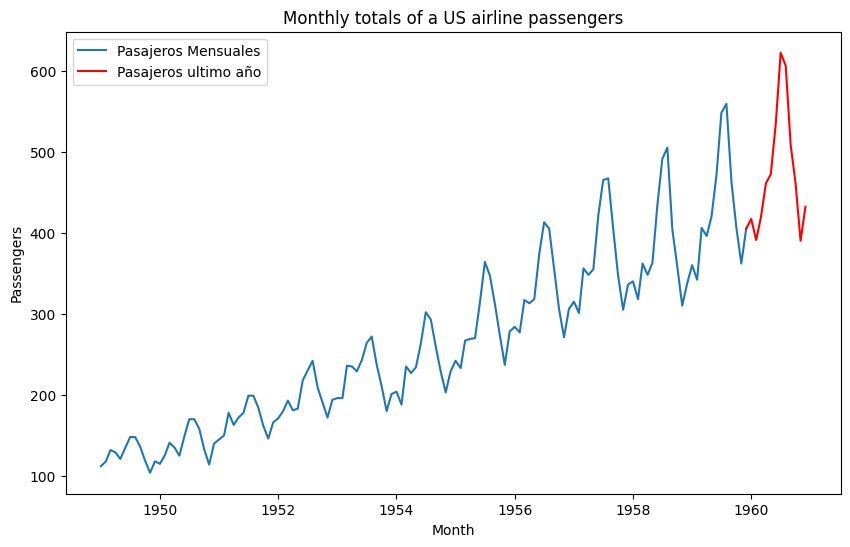

00:32:19 - cmdstanpy - INFO - Chain [1] start processing
00:32:19 - cmdstanpy - INFO - Chain [1] done processing
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


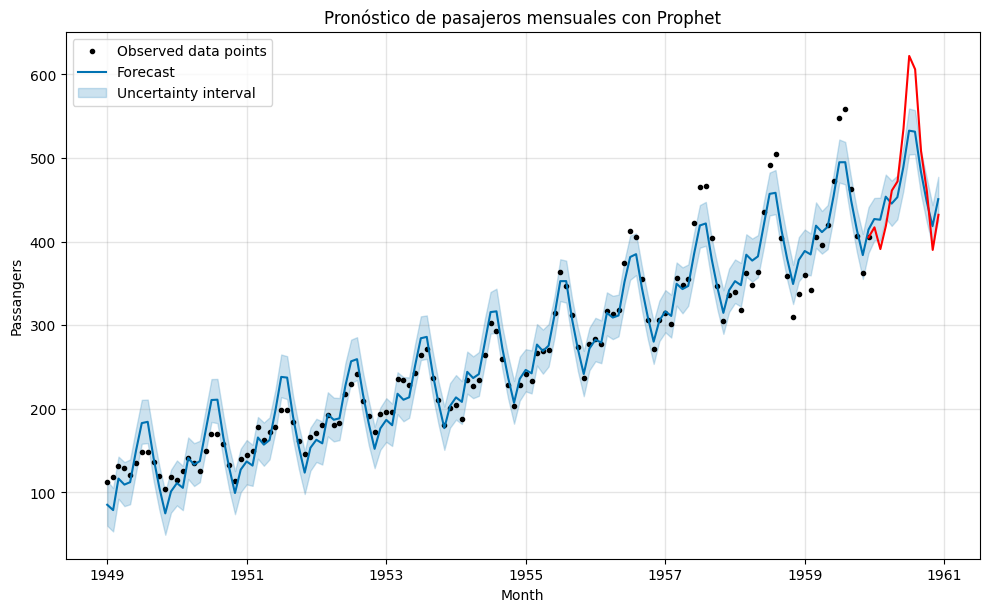

/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/isaacmenchaca/Documents/MASTER/Cuatri 6/Top Av/.venv/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in

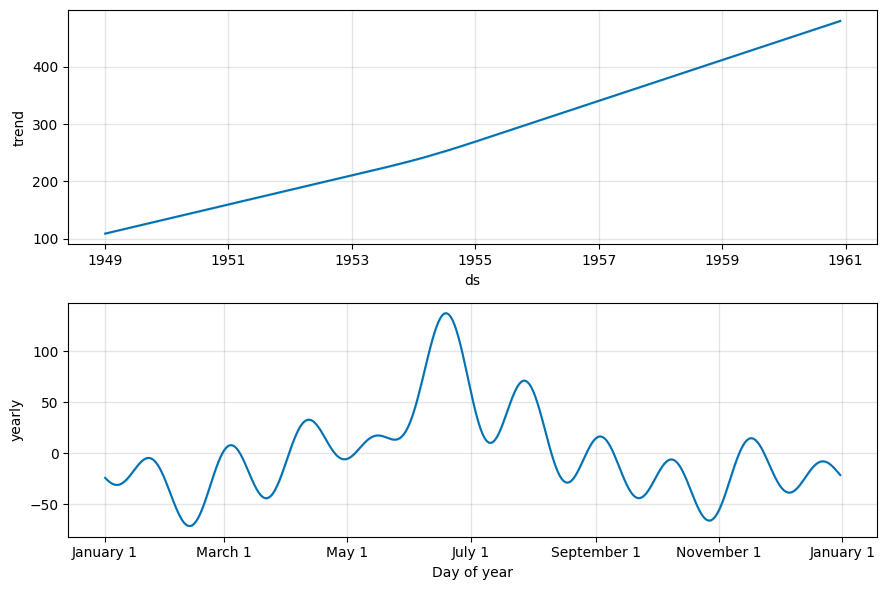

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data_last_year = data.iloc[-13:]
data_without_last_year = data.iloc[:-12]

series = data_without_last_year['Passengers']

data_without_last_year = data_without_last_year.reset_index()
data_without_last_year.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.plot(data_last_year, label='Pasajeros ultimo año', color='red')
plt.title('Monthly totals of a US airline passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Construir el modelo Prophet
model = Prophet()
model.fit(data_without_last_year)

# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

# Visualizar pronósticos
fig = model.plot(forecast, include_legend=True)
plt.plot(data_last_year, color='red')
plt.title('Pronóstico de pasajeros mensuales con Prophet')
plt.xlabel('Month')
plt.ylabel('Passangers')
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()

